<a href="https://colab.research.google.com/github/NUMBART/Face-Emotion-Recognition-System/blob/master/FinishedFER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Finished Facial Expression Recogniser**

In [0]:
import os
import numpy as np
import keras
from keras import backend as K
from keras.models import Sequential
from keras.models import load_model
from keras.layers import Activation
from keras.layers.normalization import BatchNormalization
from keras.layers.core import Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
%pylab inline
import matplotlib.image as mpimg
%matplotlib inline

Using TensorFlow backend.


Populating the interactive namespace from numpy and matplotlib


**Mounting Google Drive**

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


**Loading Model**

In [0]:
os.chdir('/content/drive/My Drive/Colab Notebooks')
print(os.getcwd())

/content/drive/My Drive/Colab Notebooks


In [0]:
model = load_model('Copy of FacialExpressionRecogniser01.h5')







Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


**Setting Path**

In [0]:
os.chdir('/content/drive/My Drive/dataset/face-expression-recognition-dataset')
cwd = os.getcwd()
files = os.listdir(cwd)  # Get all the files in that directory
print("Files in %r: %s" % (cwd, files))

Files in '/content/drive/My Drive/dataset/face-expression-recognition-dataset': ['images', 'FacialExpressionRecogniser01.h5']


In [0]:
train_path = 'images/train'
#test_path = 'images/test'
validation_path = 'images/validation'

**Creating Batches**

In [0]:
'''
train_batches = ImageDataGenerator().flow_from_directory(train_path, target_size = (64, 64), color_mode = 'grayscale', classes = ['angry', 'happy', 'sad', 'surprise'], batch_size = 64)
validation_batches = ImageDataGenerator().flow_from_directory(validation_path, target_size = (64, 64), color_mode = 'grayscale', classes = ['angry', 'happy', 'sad', 'surprise'], batch_size = 64)
#test_batches = ImageDataGenerator().flow_from_directory('Dataset', target_size = (64, 64), color_mode = 'grayscale', classes = ['test'], batch_size = 30, shuffle = 'False')
'''

"\ntrain_batches = ImageDataGenerator().flow_from_directory(train_path, target_size = (64, 64), color_mode = 'grayscale', classes = ['angry', 'happy', 'sad', 'surprise'], batch_size = 64)\nvalidation_batches = ImageDataGenerator().flow_from_directory(validation_path, target_size = (64, 64), color_mode = 'grayscale', classes = ['angry', 'happy', 'sad', 'surprise'], batch_size = 64)\n#test_batches = ImageDataGenerator().flow_from_directory('Dataset', target_size = (64, 64), color_mode = 'grayscale', classes = ['test'], batch_size = 30, shuffle = 'False')\n"

**Using Model (Summary, Resuming training, Predictions)**

In [0]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_37 (Conv2D)           (None, 64, 64, 24)        240       
_________________________________________________________________
batch_normalization_41 (Batc (None, 64, 64, 24)        96        
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 64, 64, 24)        5208      
_________________________________________________________________
batch_normalization_42 (Batc (None, 64, 64, 24)        96        
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 22, 22, 24)        14424     
_________________________________________________________________
batch_normalization_43 (Batc (None, 22, 22, 24)        96        
_________________________________________________________________
dropout_17 (Dropout)         (None, 22, 22, 24)       

In [0]:
'''
model.fit_generator(train_batches, steps_per_epoch = 150, validation_data = validation_batches, validation_steps = 36, epochs = 10, use_multiprocessing=True,
  workers=16, verbose = 2)
'''

'\nmodel.fit_generator(train_batches, steps_per_epoch = 150, validation_data = validation_batches, validation_steps = 36, epochs = 10, use_multiprocessing=True,\n  workers=16, verbose = 2)\n'

*Changing directory to that of test database*

In [0]:
os.chdir('/content/drive/My Drive/dataset/face-expression-recognition-dataset/images/test')

*Iterating through the files and predicting emotion*

Happy face 41 seems happy.


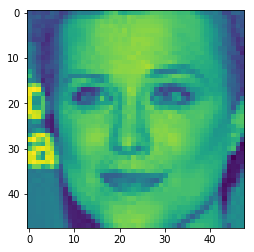

Sad face 70 seems sad.


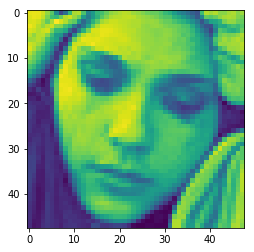

Happy face 139 seems happy.


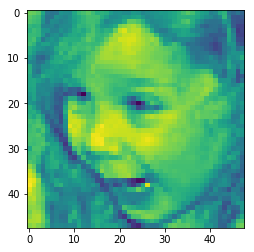

Happy face 141 seems happy.


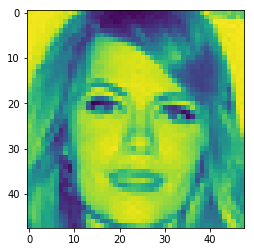

Happy face 167 seems happy.


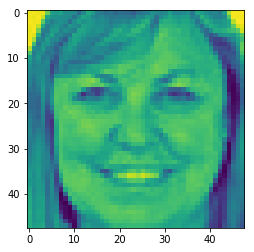

Sad face 115 seems sad.


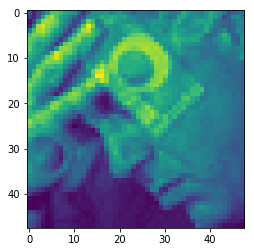

Sad face 172 seems sad.


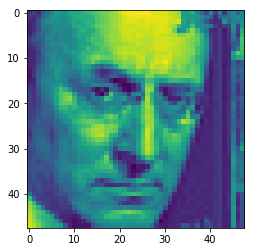

Sad face 312 seems sad.


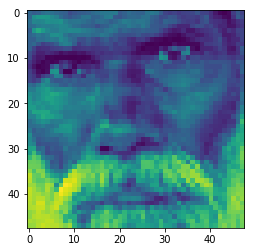

Sad face 231 seems sad.


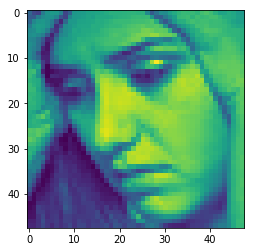

Angry face 157 seems angry.


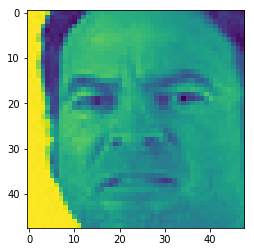

Angry face 245 seems angry.


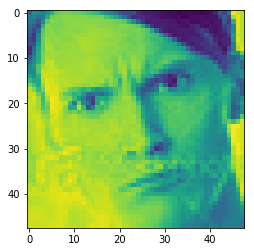

Angry face 249 seems angry.


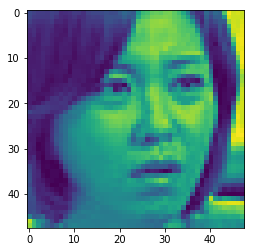

Angry face 251 seems sad.


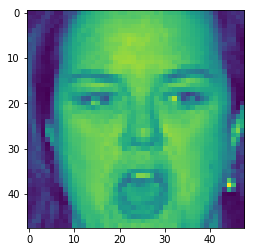

Angry face 259 seems sad.


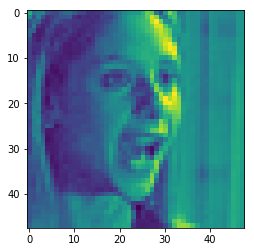

Surprised face 330 seems surprised.


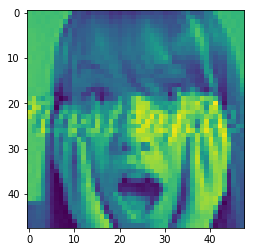

Surprised face 336 seems surprised.


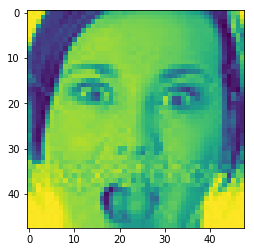

Surprised face 413 seems surprised.


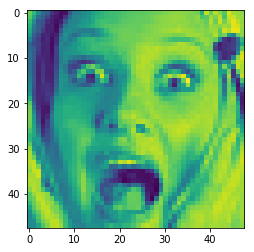

Surprised face 435 seems surprised.


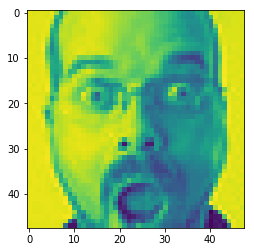

Surprised face 438 seems surprised.


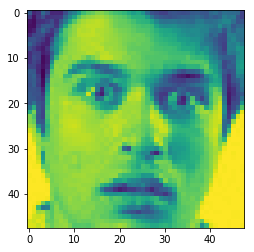

Well, and happy face Abhinav certainly seems happy.


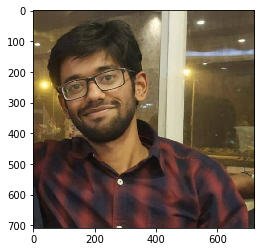

In [0]:

files = os.listdir(os.getcwd())
for file in files:
  img = image.load_img(file, color_mode = 'grayscale', target_size=(64, 64))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict_classes(images, batch_size=1)
  emotion = int(classes == [0])*'angry.' + int(classes == [1])*'happy.' + int(classes == [2])*'sad.' + int(classes == [3])*'surprised.'
  print(file[:-4] + ' seems ' + emotion)
  #https://stackoverflow.com/questions/35286540/display-an-image-with-python
  img=mpimg.imread(file, 0)
  plt.imshow(img)
  plt.show()